# Εργασία - Αναγνώρηση Προτύπων και Μηχανική Μάθηση 2024-2025
## Μέρη Α-Γ
* Ομάδα 30
* Φίλιππος Ρωσσίδης (ΑΕΜ 10379)
* Βασίλης Αϊτσίδης (ΑΕΜ 10330)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

# ΜΕΡΟΣ Α
_________________________________________________________________________

Σε αυτό το μέρος υλοποιούμε μία κλάση python για την τεχνική Maximum likelihood που θα χρησιμοποιήσουμε ώστε να κρίνουμε εάν ο δείκτεις $x$ είναι αξιόπιστος για την εκτίμηση του επιπέδου στρες των παικτών. Δομή της κλάσης:
* Θα πραγματοποιεί ταξινόμηση σε **δύο** κλάσεις όπου τα δείγματα θα είναι μονοδιάστατα και η πυκνότητας πιθανότητας δίνεται από την εξίσωση $p(x| \theta) = \frac{1}{\pi} \frac{1}{1+{(x - \theta)}^2}$.
* Οι υποψήφιες τιμές $\theta$ για τις παρακάτω διεργασίες θα δίνονται ως πίνακας στην αρχικοποίηση της κλάσης και θα αποθηκεύονται στο αντίστοιχο atribute ώστε να χρησιμοποιούνται και από τις δύο παρακάτω συναρτήσεις.
* Ως atributes επίσης αποθηκεύονται οι a priori πιθανότητες $P_1, P_2$ και οι εκτιμήσεις των $\theta_1, \theta_2$.
* Θα έχει μία συνάρτηση fit(D1,D2) που δέχεται σαν όρισματα τους δύο πίνακες με τα δείγματα για τις δύο κλάσεις. Εκτιμά με τη μέθοδο της μέγιστης πιθανοφάνειας τις τιμές των $\theta$ για τις δύο κλάσεις και τις αποθηκεύει ως attributes της κλάσης. Επίσης επιστρέφει τα $p(D_1|\theta), p(D_2|\theta)$.   
* Θα έχει μία συνάρτηση predict(D) που δέχεται σαν όρισμα ένα σύνολο D και επιστρέφει την τιμή της συνάρτησης διάκρησης για τα δείγματα.

In [2]:
class Classifier_ML:

    theta_estimation_1 = None
    theta_estimation_2 = None
    P1 = None
    P2 = None

    # initialize the class to store the candidate values of theta
    def __init__(self, thetas):
        self.thetas = thetas
    
    def fit(self, D1, D2):

        # First calculate and store the a priori probabilities P1, P2 
        self.P1 = len(D1) / (len(D1) + len(D2))
        self.P2 = len(D2) / (len(D1) + len(D2))

        # Calculate for every sample and every theta, the probability p(x|theta) for dataset  1
        probs_x_theta_1 = (1/np.pi) * (1 / (1 + (D1[:, np.newaxis] - self.thetas)**2))  

        # Compute likelihood p(D|theta) as the product for each theta (along axis 0) for dataset 1
        probs_D_theta_1 = np.prod(probs_x_theta_1, axis=0)

        # Calculate for every sample and every theta, the probability p(x|theta) for dataset  2
        probs_x_theta_2 = (1/np.pi) * (1 / (1 + (D2[:, np.newaxis] - self.thetas)**2))  

        # Compute likelihood p(D|theta) as the product for each theta (along axis 0) for dataset 2
        probs_D_theta_2 = np.prod(probs_x_theta_2, axis=0)


        # Get the value of theta that maximizes the probability p(D|theta)
        # and store it on the correct variable
        self.theta_estimation_1 = self.thetas[np.argmax(probs_D_theta_1)]
        self.theta_estimation_2 = self.thetas[np.argmax(probs_D_theta_2)]

        # return the likelihood (to plot it later)
        return probs_D_theta_1, probs_D_theta_2

    
    def predict(self, D):
        
        # Calculate for every sample the probability p(x|theta_1)
        P_x_th1 = (1/np.pi) * (1 / (1 + (D - self.theta_estimation_1)**2))

        # Calculate for every sample the probability p(x|theta_2)
        P_x_th2 = (1/np.pi) * (1 / (1 + (D - self.theta_estimation_2)**2))

        # Return matrix that contains g(x) for every x
        return np.log10(P_x_th1) - np.log10(P_x_th2) + np.log10(self.P1) - np.log10(self.P2)


### Ερώτημα 1

Eκτίμηση των $\theta_1$, $\theta_2$ με datasetes:\
D1 = {2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1} \
D2 = {-4.5, -3.4, -3.1, -3.0, -2.3}\
και plotting των $p(D_1|\theta)$, $p(D_2|\theta)$.

Theta estimation for D1 is:  2.5250501002003958 
 Theta estimation fot D2 is:  -3.2464929859719476


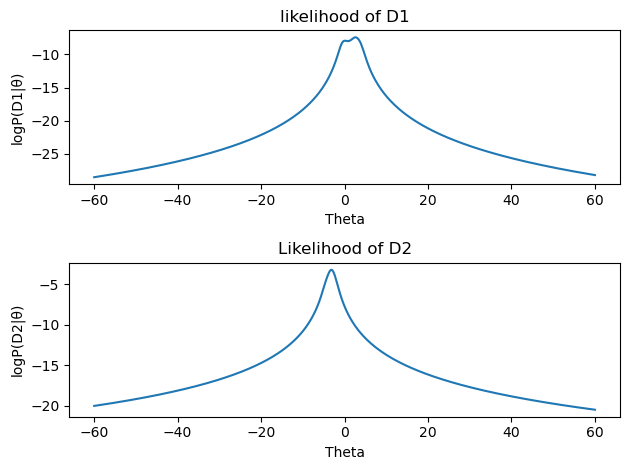

In [3]:

# Create the theta values that will be used for the calculations
theta_Num = 500
theta_interval = 120
dtheta = theta_interval / theta_Num
thetas = np.linspace(-theta_interval/2, theta_interval/2, theta_Num)

# Create Classifier object
classifier = Classifier_ML(thetas)


# Fit models to observations 
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

probs_D_theta1, probs_D_theta2 = classifier.fit(D1, D2)

print("Theta estimation for D1 is: ", classifier.theta_estimation_1, "\n", \
    "Theta estimation fot D2 is: ", classifier.theta_estimation_2)

# Plot log( p(D|theta) ) for both classes
fig, ax = plt.subplots(2, 1)
ax[0].plot(thetas, np.log10(probs_D_theta1))
ax[0].set_title("likelihood of D1")
ax[0].set_xlabel("Theta")
ax[0].set_ylabel("logP(D1|θ)")
ax[1].plot(thetas, np.log10(probs_D_theta2))
ax[1].set_xlabel("Theta")
ax[1].set_ylabel("logP(D2|θ)")
ax[1].set_title("Likelihood of D2")
fig.tight_layout()
plt.savefig('./plots/likelihoods.pdf')
plt.show()

### Ερώτημα 2

Υπολογισμός των τιμών της συνάρτησης διάκρισης $g(x)$ (*discriminant function*) για τα 12 δείγματα που έχουμε. 

Έπειτα plotting της g(x) για $x \in [-50,50]$.


,x,g(x),Class
0,2.8,1.689205,ω1
1,-0.4,0.125017,ω1
2,-0.8,-0.090887,ω1
3,2.3,1.626600,ω1
4,-0.3,0.178765,ω1
5,3.6,1.492680,ω1
6,4.1,1.344624,ω1
7,-4.5,-1.145734,ω2
8,-3.4,-1.401339,ω2
9,-3.1,-1.358416,ω2


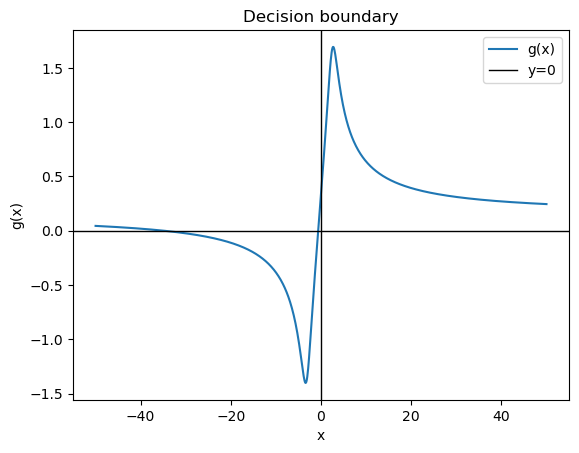

In [4]:
D = np.concatenate([D1, D2])

prediction_D = classifier.predict(D)

# Print the predictions in a nice table
table_data = pd.DataFrame({
    "x": D,
    "g(x)": prediction_D,
    "Class": ["ω1"]*len(D1) + ["ω2"]*len(D2)
})
display(table_data)

# Export to LaTeX
with open('./plots/discriminant_values_1.tex', 'w') as f:
    f.write(table_data.to_latex(index=False))

d_graph = np.linspace(-50, 50, 1000)

prediction_graph = classifier.predict(d_graph)

plt.plot(d_graph, prediction_graph)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend(["g(x)", "y=0"])
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Decision boundary")
plt.savefig('./plots/DB1.pdf')
plt.show()

Παρατηρούμε ότι η $g(x)$ είναι αρνητική όταν το δείγμα ανήκει στην κλάση $\omega_2$ και θετική αντίθετα, με μια εξέρεση το δείγμα $x=-0.8$.

# ΜΕΡΟΣ Β
_________________________________________________________________________

Τώρα υλοποιούμε για το ίδιο πρόβλημα μία κλάση python για την τεχνική Bayes estimation. Η δομή της κλάσης θα είναι παρόμοια με την αντίστοιχη για μέγιστη πιθανοφάνεια:
* Θα πραγματοποιεί ταξινόμηση σε **δύο** κλάσεις όπου τα δείγματα θα είναι μονοδιάστατα και η πυκνότητας πιθανότητας δίνεται από την εξίσωση $p(x| \theta) = \frac{1}{\pi} \frac{1}{1+{(x - \theta)}^2}$. Επιπλέον τώρα γνωρίζουμε ότι οι τιμές της άγνωστης παραμέτρου $\theta$ ακολουθούν τη συνάρτηση πυκνότητας πιθανότητας (prior): $p(\theta) = \frac{1}{10\pi} \frac{1}{1+(\frac{\theta}{10}^2)}$.
* Οι υποψήφιες τιμές $\theta$ για τις παρακάτω διεργασίες και τα ολοκληρώματα που θα χρειαστούν θα δίνονται ως πίνακας στην αρχικοποίηση της κλάσης και θα αποθηκεύονται στο αντίστοιχο atribute ώστε να χρησιμοποιούνται και από τις δύο παρακάτω συναρτήσεις.
* Ως atributes επίσης αποθηκεύονται οι a priori πιθανότητες $P_1, P_2$ και οι εκτιμήσεις των $p(\theta|D_1), p(\theta|D_2)$.
* Θα έχει μία συνάρτηση fit(D1,D2) που δέχεται σαν όρισματα τους δύο πίνακες με τα δείγματα για τις δύο κλάσεις. Εκτιμά με τη μέθοδο μπεΰζιανής εκτίμησης τους πίνακες $p(\theta|D_1), p(\theta|D_2)$ για τις δύο κλάσεις και τις αποθηκεύει ως attributes της κλάσης. 
* Θα έχει μία συνάρτηση predict(D) που δέχεται σαν όρισμα ένα σύνολο D και επιστρέφει την τιμή της συνάρτησης διάκρησης για τα δείγματα.

In [5]:
# Function to estimate an integral using the trapezoid rule
# it takes as an input the sampling of a function and the sampling period
def trapezoid_integral (f:np.array, dx:float):
    return np.sum (0.5 * ( f[0:len(f)-1] + f[1:len(f)] ) * dx)


In [6]:
class Classifier_Bayes:
    # a posteriori probabilities p(theta|D1), p(theta|D2)
    P_theta_D1 = None
    P_theta_D2 = None
    P1 = None
    P2 = None

    def __init__(self, thetas, dtheta):
        self.thetas = thetas
        self.dtheta = dtheta

    def fit(self, D1, D2):

        # First calculate and store the a priori probabilities P1, P2 
        self.P1 = len(D1) / (len(D1) + len(D2))
        self.P2 = len(D2) / (len(D1) + len(D2))

        datasets = [D1,D2]
        
        for i in range (2):
            # Do the calculations for the two classes 
            D = datasets[i]

            # Calculate for every sample and every theta, the probability p(x|theta)
            probs_x_theta = (1/np.pi) * (1 / (1 + (D[:, np.newaxis] - self.thetas)**2))  

            # Compute likelihood p(D|theta) as the product for each theta (along axis 0)
            probs_D_theta = np.prod(probs_x_theta, axis=0)  

            # Calculate prior probability p(theta)
            probs_theta = ( 1 / 10*np.pi ) * ( 1 / ( 1 + (self.thetas/10)**2 ) )

            # Calculate integral p(D|theta)p(theta) dtheta
            integral = trapezoid_integral( probs_D_theta * probs_theta, self.dtheta )

            # Calculate a posteriori probability p(theta|D)
            P_theta_D = ( probs_D_theta * probs_theta ) / integral

            # store the a posteriori probability in the correct variable
            if (i==0):
                self.P_theta_D1 = P_theta_D
            else:
                self.P_theta_D2 = P_theta_D


    def predict(self, D):

        # Calculate for every sample of the new dataset and every theta, the probability p(x|theta)
        probs_x_theta = (1/np.pi) * (1 / (1 + (D[:, np.newaxis] - thetas)**2))  

        # make an empty instance for the probabilities p(x|D1) of every x in the new dataset
        probs_x_D1 = np.empty(len(D))
        for i in range (len(D)):
            # Calculate p(x|D1) as the integral of p(x|theta)*p(theta|D1) for every x in the new dataset
            # p(x|theta) is the i row in the probs_x_theta matrix and p(theta|D1) is stored in the class
            probs_x_D1[i] = trapezoid_integral( probs_x_theta[i] * self.P_theta_D1, dtheta )

        # make an empty instance for the probabilities p(x|D2) of every x in the new dataset
        probs_x_D2 = np.empty(len(D))
        for i in range (len(D)):
            # Calculate p(x|D2) as the integral of p(x|theta)*p(theta|D2) for every x in the new dataset
            # p(x|theta) is the i row in the probs_x_theta matrix and p(theta|D2) is stored in the class
            probs_x_D2[i] = trapezoid_integral( probs_x_theta[i] * self.P_theta_D2, dtheta )
        
        # calculate and return h(x)
        return np.log10(probs_x_D1) - np.log10(probs_x_D2) + np.log10(self.P1) - np.log10(self.P2)

        


### Ερώτημα 1

Υπολογισμός των *a posteriori* πιθανοτήτων $p(\theta|D_1)$, $p(\theta|D_2)$ και plotting συναρτήσει της παραμέτρου *θ*.

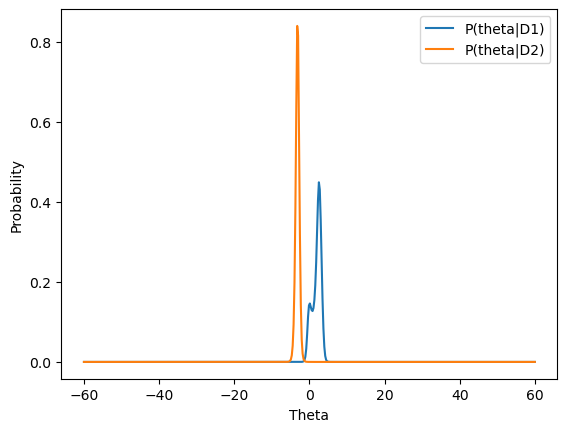

In [17]:
classifier_bayes = Classifier_Bayes(thetas, dtheta)

# Fit models to observations
classifier_bayes.fit(D1, D2)

# Plot the posterior probability p(theta|D1)
plt.plot(thetas, classifier_bayes.P_theta_D1)

# Plot the posterior probability p(theta|D2)
plt.plot(thetas, classifier_bayes.P_theta_D2)
plt.legend(["P(theta|D1)", "P(theta|D2)"])
plt.xlabel("Theta")
plt.ylabel("Probability")
plt.savefig('./plots/posterior.pdf')
plt.show()


Γράφημα της $p(\theta)$

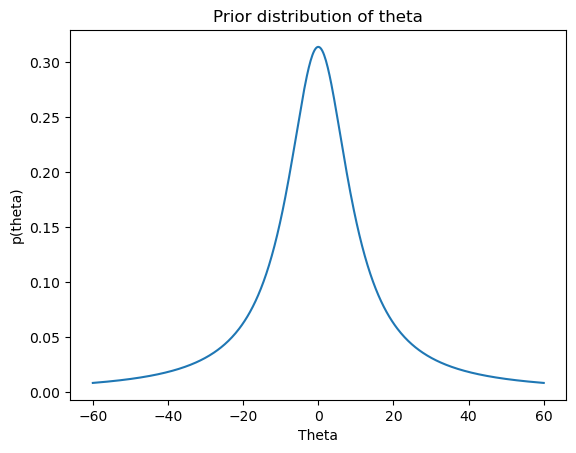

In [19]:
probs_theta = ( 1 / 10*np.pi ) * ( 1 / ( 1 + (thetas/10)**2 ) )
plt.plot(thetas, probs_theta)
plt.title("Prior distribution of theta")
plt.xlabel("Theta")
plt.ylabel("p(theta)")
plt.savefig('./plots/prior.pdf')
plt.show()

### Ερώτημα 2

Υπολογισμός των τιμών της συνάρτησης διάκρισης $h(x)$ (*discriminant function*) για τα 12 δείγματα που έχουμε. 

Έπειτα plotting της h(x) για $x \in [-50,50]$.


,x,h(x),Class
0,2.8,1.481023,ω1
1,-0.4,0.462545,ω1
2,-0.8,0.228873,ω1
3,2.3,1.422087,ω1
4,-0.3,0.514863,ω1
5,3.6,1.419364,ω1
6,4.1,1.312459,ω1
7,-4.5,-1.038287,ω2
8,-3.4,-1.162248,ω2
9,-3.1,-1.114946,ω2


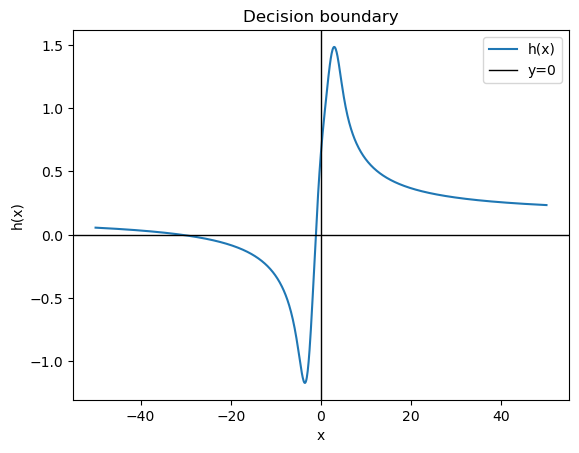

In [8]:
prediction_D_Bayes = classifier_bayes.predict(D)

# Print the predictions in a nice table
table_data = pd.DataFrame({
    "x": D,
    "h(x)": prediction_D_Bayes,
    "Class": ["ω1"]*len(D1) + ["ω2"]*len(D2)
})
display(table_data)

# Export to LaTeX
with open('./plots/discriminant_values_2.tex', 'w') as f:
    f.write(table_data.to_latex(index=False))

# Prediction for the new dataset
prediction = classifier_bayes.predict(d_graph)

# Plot prediction for the new dataset
plt.plot(d_graph, prediction)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend(["h(x)", "y=0"])
plt.xlabel("x")
plt.ylabel("h(x)")
plt.title("Decision boundary")
plt.savefig('./plots/DB2.pdf')
plt.show()

Παρατηρούμε ότι τώρα η $h(x)$ είναι αρνητική όταν το δείγμα ανήκει στην κλάση $\omega_2$ και θετική αντίθετα, χωρίς εξεραίσεις στα 12 δείγματα που έχουμε.

Παρατηρούμε επίσης ότι η h(x) έχει ίδια μορφή με την g(x), αλλά έχει μετατοπιστεί κατάλληλα ώστε να εκτιμήσει σωστά και τα 12 δείγματα. 

# ΜΕΡΟΣ Γ 

Θα ταξινομήσουμε τα δεδομένα του dataset της sklearn: iris. Όμως θα χρησιμοποιήσουμε μόνο τα πρώτα δύο χαρακτηριστικά που μας δίνονται, με επιπλοκές που εξιγούνται στην αναφορά. Η εκτίμηση θα πραγματοποιηθεί με τις συναρτήσεις της βιβλιοθήκης sklearn.


## Ενότητα 1

Σε αυτό το ερώτημα χρησιμοποιούμε την τεχνική decision tree.
Χρησιμοποιούμε 50% των δειγμάτων για train και τα υπόλοιπα για test.
Υλοποιούμε μια συνάρτηση χρησιμοποιόντας την GridSearch για να βρούμε το βέλτιστο βάθος του δέντρου. 

#### Ερώτημα 1

In [9]:
# Load the iris dataset
iris = datasets.load_iris() 
X = iris.data
y = iris.target

# Reduce the dataset to 2 features
X_reduced = X[:, 0:2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.5, random_state=42)

# Create a Decision Tree Classifier
DTC = DecisionTreeClassifier(random_state=42)


# Function to tune the model using GridSearchCV
def tune_model(model, param_grid, X_train, X_test, y_train, y_test):
    grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1) # Create a GridSearchCV object
    grid.fit(X_train, y_train) # Train the model
    y_pred = grid.predict(X_test) # Make predictions
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    best_model = grid.best_estimator_ # Get the best model
    return accuracy, best_model

# Tune the model
param_grid = {'max_depth': np.arange(1, 10)}
best_accuracy, best_model = tune_model(DTC, param_grid, X_train, X_test, y_train, y_test)
y_pred = best_model.predict(X_test)
print("Highest accuracy: ", best_accuracy, "\nBest model: ", best_model)



Highest accuracy:  0.7866666666666666 
Best model:  DecisionTreeClassifier(max_depth=3, random_state=42)


ποσοστό ταξινόμησης: 0.7866666 με βάθος δέντρου: 3

#### Ερώτημα 2

Απεικόνηση των ορίων απόφασης.

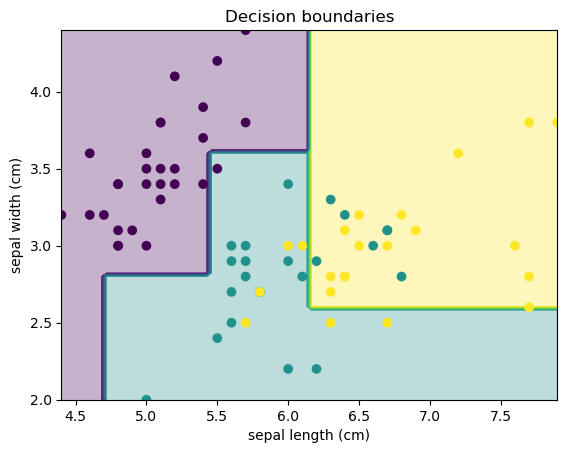

In [10]:

# Plot the decision boundary
feature_1, feature_2 = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100), np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)) # Create a grid of points
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T # Reshape the grid
predictions = best_model.predict(grid).reshape(feature_1.shape) # Make predictions using the best model
plt.contourf(feature_1, feature_2, predictions, alpha=0.3, cmap='viridis',levels=100) # Plot the decision boundaries
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test) # Scatter plot of the test data
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Decision boundaries")
plt.savefig('./plots/DB3.pdf')
plt.show()


Τα όρια απόφασης φαίνονται με τις 3 χρωματισμένες περιοχές, ενώ τα scattered points δείχνουν τα δείγματα χρωματισμένα σύμφωνα με την κλάση στην οποία ανήκουν. 

Αρχικά παρατηρούμε μια επικάλυπη στα δείγματα, επομένως δεν είναι εντολώς διαχωρίσημα (χωρίς τη χρήση της 3ης διάστασης). Ο αλγόριθμος κάνει μια καλή προσπάθεια διαχώρισης με ευθείες γραμμές.

## Ενότητα 2

Τώρα χρησιμοποιούμε την τεχνική Random Forest με 100 δέντρα και μέθοδο Bootstrap. Χρησιμοποιούμε το 50% του συνόλου για train το οποίο χωρίζουμε σε 100 σύνολα, κάθε ένα εκ των οποίων 50% του συνόλου εκπέδευσης.

#### Ερώτημα 1

In [11]:
# Create a Random Forest Classifier
RFC = RandomForestClassifier(random_state=42, n_estimators=100, bootstrap=True, max_samples = 0.5) 
RFC.fit(X_train, y_train) # Train the model
y_pred = RFC.predict(X_test) # Make predictions
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
print("Accuracy without hyperparameter tuning: ", accuracy) # Print the accuracy

# Tune the hyperparameters using the function we created above
best_accuracy, best_model = tune_model(RFC, param_grid, X_train, X_test, y_train, y_test) 
y_pred = best_model.predict(X_test) # Make predictions
print("Highest accuracy: ", best_accuracy, "\nBest model: ", best_model) # Print the best model and its accuracy


Accuracy without hyperparameter tuning:  0.76
Highest accuracy:  0.8 
Best model:  RandomForestClassifier(max_depth=3, max_samples=0.5, random_state=42)


μέγιστο ποσοστό: 0.8, βάθος: 3

#### Ερώτημα 2

Απεικόνηση ορίων απόφασης.

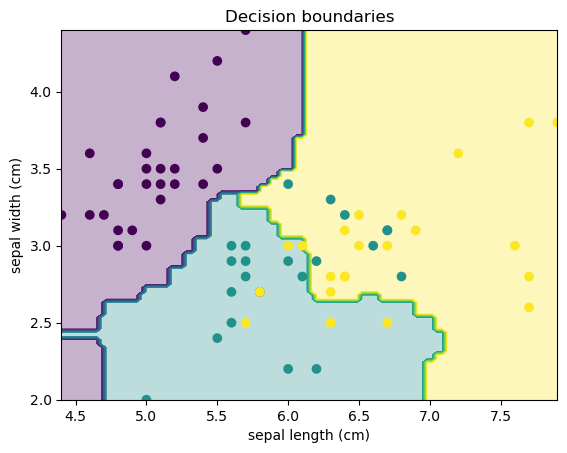

In [12]:

# Plot the decision boundary
feature_1, feature_2 = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100), np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)) # Create a meshgrid
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T # Reshape the grid
predictions = best_model.predict(grid).reshape(feature_1.shape) # Make predictions using the best model
plt.contourf(feature_1, feature_2, predictions, alpha=0.3, cmap='viridis',levels=100) # Plot the decision boundaries
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test) # Scatter plot of the test data
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Decision boundaries")
plt.savefig('./plots/DB4.pdf')
plt.show()



Παρατηρούμε ότι τα όρια είναι πιο καλά προσαρμοσμένα στα δεδομένα. Οι γραμμές των ορίων απόφασης είναι πιο refined. 

Ενδεχομένως να υφίστανται και overfitting.

#### Ερώτημα 3

Δοκιμή για διάφορες τιμές του *γ* και παρατηρήσεις

In [20]:
max_samples_array = np.linspace(0.01,0.99,100) # Create an array of values for gamma

accuracy_wrt_gamma = np.zeros_like(max_samples_array) # Create an array to store the accuracy

for i in range (len(max_samples_array)): # Loop over the values of gamma
    gamma = max_samples_array[i]


    RFC_1 = RandomForestClassifier(random_state=42, n_estimators=100, bootstrap=True, max_samples = gamma) # Create a Random Forest Classifier
    RFC_1.fit(X_train, y_train) # Train the model
    y_pred = RFC_1.predict(X_test) # Make predictions
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy

    best_accuracy, best_model = tune_model(RFC_1, param_grid, X_train, X_test, y_train, y_test) # Tune the model
    y_pred = best_model.predict(X_test) # Make predictions
    
    accuracy_wrt_gamma[i] = best_accuracy # Store the accuracy


Γράφημα μεταβολής της ακρίβειας συναρτήσει των τιμών του *γ*

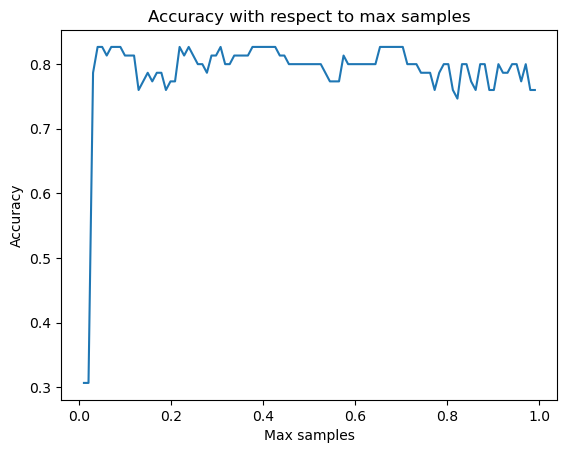

In [21]:
plt.plot(max_samples_array, accuracy_wrt_gamma)
plt.xlabel("Max samples")
plt.ylabel("Accuracy")
plt.title("Accuracy with respect to max samples")
plt.savefig('./plots/accuracy.pdf')
plt.show()

Βλέπουμε ότι για πολύ μικρά $\gamma$ ($<0.1$) η ακρίβεια μειώνεται σημαντικά. Όμως για τις υπόλοιπες τιμές, η ακρίβεια αυξομειώνεται χωρίς αναγνωρίσιμο μοτίβο.